In [1]:
from pprint import pp
import pyvisa
from srsinst.sr860 import SR865A
import math
import time
import matplotlib.pyplot as plt

# 連到SR865A
rm = pyvisa.ResourceManager()
inst = SR865A('visa', rm.list_resources()[0])

In [9]:
# 設定buffer大小，這會影響到要量測多久
# 一個X佔4Bytes
# buffer設4MBytes，量X的話 可以存1024000組
# buffer設4MBytes，量XY的話 可以存512000組
# buffer設4MBytes，量r,theta的話 可以存512000組
# buffer設4MBytes，量X,Y,r,theta的話 可以存256000組
inst.capture.buffer_size_in_kilobytes = 4096
# 設定捕捉模式
inst.capture.config = 'RT'
# 設定參考光
inst.ref.reference_source = 'external'
# 設定時間常數
time_constant = 30e-3
inst.signal.time_constant = time_constant
# 獲取這個時間常數下可獲得的最大頻率
max = inst.capture.max_rate

available_capture_rate = []
for j in range(0, 21):
    available_capture_rate.append(max/(2**j))

pp(f"時間常數為:{time_constant}，以下為可用的取樣頻率和對應的n:")
for i, capture_rate in enumerate(available_capture_rate):
    pp(f"{i}: {capture_rate} Hz")

'時間常數為:0.03，以下為可用的取樣頻率和對應的n:'
'0: 9765.625 Hz'
'1: 4882.8125 Hz'
'2: 2441.40625 Hz'
'3: 1220.703125 Hz'
'4: 610.3515625 Hz'
'5: 305.17578125 Hz'
'6: 152.587890625 Hz'
'7: 76.2939453125 Hz'
'8: 38.14697265625 Hz'
'9: 19.073486328125 Hz'
'10: 9.5367431640625 Hz'
'11: 4.76837158203125 Hz'
'12: 2.384185791015625 Hz'
'13: 1.1920928955078125 Hz'
'14: 0.5960464477539062 Hz'
'15: 0.2980232238769531 Hz'
'16: 0.14901161193847656 Hz'
'17: 0.07450580596923828 Hz'
'18: 0.03725290298461914 Hz'
'19: 0.01862645149230957 Hz'
'20: 0.009313225746154785 Hz'


'目前取樣頻率為:152.587890625 Hz'
'請等待16秒'
3
6


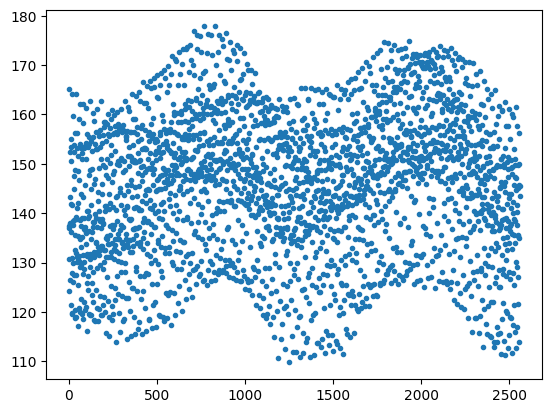

In [22]:
n = int(input('請根據上面顯示的可用取樣頻率輸入對應的n'))
inst.capture.rate_divisor_exponent = n
current_capture_rate = max/(2**n)
# inst.capture.start(0,0)
pp(f"目前取樣頻率為:{current_capture_rate} Hz")
size = inst.capture.buffer_size_in_kilobytes
# 512000代表512000組(r,theta)
wait_time_s = 512000/current_capture_rate
# 在這階段可以得知你要的量測頻率，看你要量多少時間，回去調buffer大小
# buffer大小=量測時間*(你的捕捉率向上取整)*4(單一個數據佔4byte)*點數模式([x]->1 or [x y]->2 or [r theta]->2 or [x y r theta]->4)/1024(Bytes轉成KBytes)
# inst.capture.buffer_size_in_kilobytes = buffer大小向上取整
# 16秒
buffer_size = 16*math.ceil(current_capture_rate)*4*2/1024
inst.capture.buffer_size_in_kilobytes = math.ceil(buffer_size)
wait_time_s = buffer_size*1024/math.ceil(current_capture_rate)/2/4
pp(f"請等待{math.ceil(wait_time_s)}秒")
# 開始擷取數據
inst.capture.start(0,0)
pp(inst.capture.state)
time.sleep(math.ceil(wait_time_s)+2)

pp(inst.capture.state)

data = inst.capture.get_all_data()

plt.plot(data[1,:],marker='.',linestyle='')
plt.show()

In [21]:
inst.capture.dir

{'components': {},
 'commands': {'buffer_size_in_kilobytes': ('IntCommand', 'CAPTURELEN'),
  'config': ('DictCommand', 'CAPTURECFG'),
  'max_rate': ('FloatGetCommand', 'CAPTURERATEMAX'),
  'rate_divisor_exponent': ('IntSetCommand', 'CAPTURERATE'),
  'rate': ('FloatGetCommand', 'CAPTURERATE'),
  'state': ('IntGetCommand', 'CAPTURESTAT'),
  'data_size_in_bytes': ('IntGetCommand', 'CAPTUREBYTES'),
  'data_size_in_kilobytes': ('IntGetCommand', 'CAPTUREPROG')},
 'methods': ['start', 'stop', 'get_data', 'get_all_data']}